Assignment 1:
    - Chapter 1 - Problem 12, Problems 26 and 27
    - Chapter 2 - Problem 13, Problem 19, Problem 21, Problem 22, Problem 23

In [1]:
import math
import pandas as pd
import numpy as np
from scipy.stats import t, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

### Chapter 1 Ex 12

##### Fish Oil and Blood Pressure. Researchers used 7 red and 7 black playing cards to randomly assign 14 volunteer males with high blood pressure to one of two diets for four weeks: a fish oil diet and a standard oil diet. The reductions in diastolic blood pressure are shown below:

In [2]:
df = pd.DataFrame({'Fish oil diet': [8,12,10,14,2,0,0], 'Regular oil diet': [-6, 0,1,2,-3,-4,2]})

In [3]:
df.head()

,Fish oil diet,Regular oil diet
0,8,-6
1,12,0
2,10,1
3,14,2
4,2,-3


In [4]:
df.describe()

,Fish oil diet,Regular oil diet
count,7.000000,7.000000
mean,6.571429,-1.142857
std,5.855400,3.184785
min,0.000000,-6.000000
25%,1.000000,-3.500000
50%,8.000000,0.000000
75%,11.000000,1.500000
max,14.000000,2.000000


In [6]:
df.median()

Fish oil diet       8.0
Regular oil diet    0.0
dtype: float64

Even though the experiment can be considered as randomised controlled, we can still draw inference from the measures of central tendency.

Mean value of the samples in the 2 sets are different which can be attributed to the type of diet itself.

Same goes for the difference in Median (diffreence in rise by 8).

### Chapter 1 Ex 26

##### Environmental Voting of Democrats and Republicans in the U.S. House of Representatives.

<p>Each year, the League of Conservation Voters (LCV) identifies legislative votes taken in each
house of the U.S. Congress—votes that are highly influential in establishing policy and action on
environmental problems. The LCV then publishes whether each member of Congress cast a proenvironment
or an anti-environment vote. Display 1.15 shows these votes during the years 2005,
2006, and 2007 for members of the House of Representatives. Evaluate the evidence supporting
party differences in the percentage of pro-environment votes.Write a brief report of your conclusion,
including a graphical display and summary statistics.</p>

In [7]:
df_ex26 = pd.read_csv('./Datasets/ex0126.csv')

In [8]:
df_ex26.head()

,Unnamed: 0,State,Representative,Party,Pro05,Anti05,Pro06,Anti06,Pro07,Anti07,PctPro
0,1,Alabama,Bonner,R,2.0,16.0,3.0,9.0,2.0,18.0,14.00
1,2,Alabama,Everett,R,0.0,18.0,1.0,11.0,2.0,18.0,6.00
2,3,Alabama,Rogers,R,1.0,17.0,2.0,10.0,3.0,17.0,12.00
3,4,Alabama,Aderholt,R,0.0,18.0,0.0,12.0,2.0,18.0,4.00
4,5,Alabama,Cramer,D,5.0,13.0,4.0,7.0,14.0,6.0,46.94


In [9]:
df_ex26.describe()

,Unnamed: 0,Pro05,Anti05,Pro06,Anti06,Pro07,Anti07,PctPro
count,492.000000,437.00000,437.000000,434.000000,434.000000,435.000000,430.000000,492.000000
mean,246.500000,8.01373,9.526316,5.813364,5.801843,10.645977,9.200000,50.907846
std,142.172431,7.17378,7.227773,4.856814,4.815525,7.729511,7.737054,39.487924
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,123.750000,1.00000,1.000000,1.000000,0.250000,2.000000,2.000000,7.080000
50%,246.500000,6.00000,10.000000,5.000000,6.000000,14.000000,6.000000,59.000000
75%,369.250000,16.00000,17.000000,11.000000,11.000000,18.000000,18.000000,92.000000
max,492.000000,18.00000,18.000000,12.000000,12.000000,20.000000,20.000000,100.000000


<p>To evaluate the evidence supporting party differences in the percentage of pro-environment votes, we can first create a bar plot showing the average percentage of pro-environment votes for each party.</p>
<p>To do this, we can group the data by party and calculate the mean percentage of pro-environment votes for each group.</p>

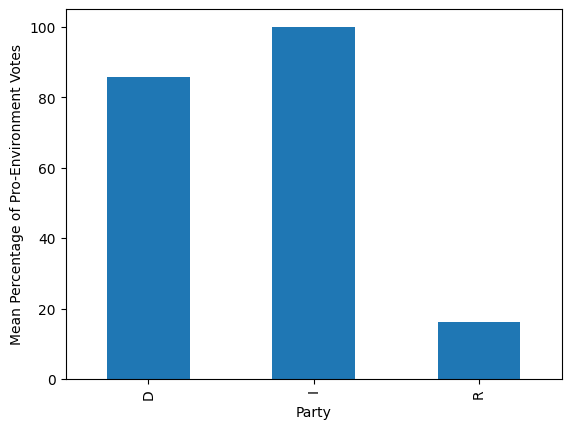

In [10]:
# Group the data by party and calculate the mean percentage of pro-environment votes for each group
party_grouped = df_ex26.groupby('Party')['PctPro'].mean()

# Create a bar plot showing the mean percentage of pro-environment votes for each party
party_grouped.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Mean Percentage of Pro-Environment Votes')
plt.show()

###### The bar plot shows that, on average, representatives from the Democratic party had a higher percentage of pro-environment votes than those from the Republican party.

<p>We can also calculate summary statistics for the percentage of pro-environment votes for each party to further support this conclusion.</p>

In [11]:
# Calculate the mean, median, and standard deviation for the percentage of pro-environment votes by party
mean_pct_pro = df_ex26.groupby('Party')['PctPro'].mean()
median_pct_pro = df_ex26.groupby('Party')['PctPro'].median()
std_pct_pro = df_ex26.groupby('Party')['PctPro'].std()

# Print the summary statistics
print(f'Mean percentage of pro-environment votes: {mean_pct_pro}')
print(f'Median percentage of pro-environment votes: {median_pct_pro}')
print(f'Standard deviation of percentage of pro-environment votes: {std_pct_pro}')

Mean percentage of pro-environment votes: Party
D     85.897942
I    100.000000
R     16.172602
Name: PctPro, dtype: float64
Median percentage of pro-environment votes: Party
D     92.000
I    100.000
R      7.275
Name: PctPro, dtype: float64
Standard deviation of percentage of pro-environment votes: Party
D    15.306245
I          NaN
R    20.962347
Name: PctPro, dtype: float64


<p>The summary statistics show that the mean percentage of pro-environment votes was higher for the Democratic party (85.9%) compared to the Republican party (16.2%). The standard deviation was lower for the Democratic party (15.3%), indicating lower variability in the percentage of pro-environment votes among representatives from this party.</p>

<p>Overall, the bar plot and summary statistics provide strong evidence supporting party differences in the percentage of pro-environment votes, with representatives from the Democratic party having a higher average percentage of pro-environment votes compared to those from the Republican party.</p>

<p>We can safely ignore Independents as only one member exists in the dataset.</p>

### Chapter 1 Ex 27

##### Environmental Voting of Democrats and Republicans in the U.S. Senate.

In [12]:
df_ex27 = pd.read_csv('./Datasets/ex0127.csv')

In [13]:
df_ex27.head()

,Unnamed: 0,State,Senator,Party,Pro2005,Anti2005,Pro2006,Anti2006,Pro2007,Anti2007,PctPro
0,1,Alabama,Session,R,1.0,18.0,0.0,7.0,2.0,13.0,7.32
1,2,Alabama,Shelby,R,1.0,19.0,0.0,7.0,1.0,14.0,4.76
2,3,Alaska,Murkowski,R,2.0,17.0,1.0,6.0,6.0,9.0,21.95
3,4,Alaska,Stevens,R,1.0,19.0,1.0,6.0,4.0,11.0,14.29
4,5,Arizona,Kyle,R,1.0,19.0,2.0,5.0,2.0,13.0,11.90


In [14]:
df_ex27.describe()

,Unnamed: 0,Pro2005,Anti2005,Pro2006,Anti2006,Pro2007,Anti2007,PctPro
count,112.000000,100.000000,100.000000,100.000000,100.000000,101.000000,101.000000,112.000000
mean,56.500000,9.070000,10.590000,3.180000,3.690000,7.742574,6.950495,50.747946
std,32.475632,7.588209,7.667451,2.610701,2.654118,5.354724,5.324239,36.867638
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.750000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,11.702500
50%,56.500000,8.500000,11.500000,3.000000,4.000000,9.000000,5.000000,54.495000
75%,84.250000,17.000000,18.000000,5.000000,6.000000,13.000000,13.000000,86.670000
max,112.000000,20.000000,20.000000,7.000000,7.000000,15.000000,15.000000,100.000000


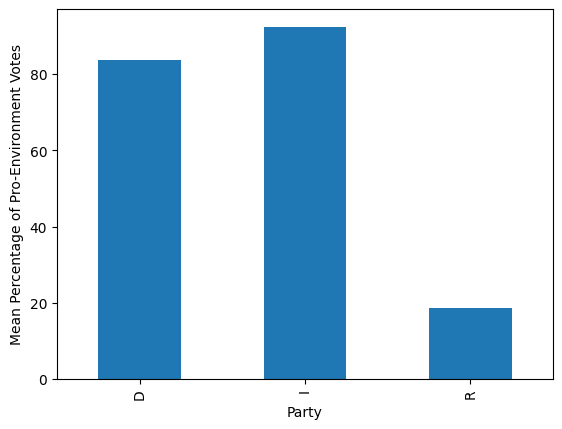

In [15]:
# Group the data by party and calculate the mean percentage of pro-environment votes for each group
party_grouped = df_ex27.groupby('Party')['PctPro'].mean()

# Create a bar plot showing the mean percentage of pro-environment votes for each party
party_grouped.plot(kind='bar')
plt.xlabel('Party')
plt.ylabel('Mean Percentage of Pro-Environment Votes')
plt.show()

In [16]:
# Calculate the mean, median, and standard deviation for the percentage of pro-environment votes by party
mean_pct_pro = df_ex27.groupby('Party')['PctPro'].mean()
median_pct_pro = df_ex27.groupby('Party')['PctPro'].median()
std_pct_pro = df_ex27.groupby('Party')['PctPro'].std()

# Print the summary statistics
print(f'Mean percentage of pro-environment votes: {mean_pct_pro}')
print(f'Median percentage of pro-environment votes: {median_pct_pro}')
print(f'Standard deviation of percentage of pro-environment votes: {std_pct_pro}')

Mean percentage of pro-environment votes: Party
D    83.641346
I    92.436667
R    18.545789
Name: PctPro, dtype: float64
Median percentage of pro-environment votes: Party
D    86.67
I    92.31
R    11.90
Name: PctPro, dtype: float64
Standard deviation of percentage of pro-environment votes: Party
D    12.513039
I     0.837218
R    19.956449
Name: PctPro, dtype: float64


### Chapter 2 Ex 13

##### Fish Oil and Blood Pressure. 
Reconsider the changes in blood pressures for men placed on a
fish oil diet and for men placed on a regular oil diet, from Chapter 1, Exercise 12. Do the following steps to compare the treatments:

<ul>
    <li>(a) Compute the averages and the sample standard deviations for each group separately.</li>
    <li>(b) Compute the pooled estimate of standard deviation using the formula in Section 2.3.2.</li>
    <li>(c) Compute SE.Y 2 ! Y 1/ using the formula in Section 2.3.2.</li>
<li>(d) What are the degrees of freedom associated with the pooled estimate of standard deviation?
    What is the 97.5th percentile of the t-distribution with this many degrees of freedom?</li>
    <li>(e) Construct a 95% confidence interval for !2 ! !1 using the formula in Section 2.3.3.</li>
    <li>(f) Compute the t -statistic for testing equality as shown in Section 2.3.5.</li>
<li>(g) Find the one-sided p-value (as evidence that the fish oil diet resulted in greater reduction
of blood pressure) by comparing the t -statistic in (f) to the percentiles of the appropriate
t-distribution (by reading the appropriate percentile from a computer program or
calculator).</li>
</ul>

In [17]:
df_ex0213 = pd.DataFrame({'Fish oil diet': [8,12,10,14,2,0,0], 'Regular oil diet': [-6, 0,1,2,-3,-4,2]})

In [18]:
df_ex0213.head()

,Fish oil diet,Regular oil diet
0,8,-6
1,12,0
2,10,1
3,14,2
4,2,-3


###### (a) Compute the averages and the sample standard deviations for each group separately.

In [19]:
df_ex0213.describe()

,Fish oil diet,Regular oil diet
count,7.000000,7.000000
mean,6.571429,-1.142857
std,5.855400,3.184785
min,0.000000,-6.000000
25%,1.000000,-3.500000
50%,8.000000,0.000000
75%,11.000000,1.500000
max,14.000000,2.000000


In [20]:
df_ex0213.std()

Fish oil diet       5.855400
Regular oil diet    3.184785
dtype: float64

###### (b) Compute the pooled estimate of standard deviation using the formula in Section 2.3.2.

In [21]:
fish_oil_dof = reg_oil_dof = len(df_ex0213) - 1
estimated_pooled_sd = math.sqrt(((fish_oil_dof * (df_ex0213.std()["Fish oil diet"])**2) + (reg_oil_dof * (df_ex0213.std()["Regular oil diet"])**2)) / (fish_oil_dof + reg_oil_dof))
print(f"Pooled estimate of std deviation={estimated_pooled_sd}")

Pooled estimate of std deviation=4.713203338949605


###### (c) Compute SE.Y 2 ! Y 1/ using the formula in Section 2.3.2.

In [22]:
SE_diff = estimated_pooled_sd * math.sqrt((1/len(df_ex0213)) + (1/len(df_ex0213)))
print(f"Standard error of difference={SE_diff}")

Standard error of difference=2.519313155506914


###### (d) What are the degrees of freedom associated with the pooled estimate of standard deviation? What is the 97.5th percentile of the t-distribution with this many degrees of freedom?

In [23]:
dof = len(df_ex0213["Fish oil diet"]) + len(df_ex0213["Regular oil diet"]) - 2
print(f"Degrees of freedom={dof}")

Degrees of freedom=12


In [24]:
# Calculate the 97.5th percentile of the t-distribution with 12 degrees of freedom
t_value = t.ppf(0.975, df=12)

print(f"97.5th percentile of the t-distribution with 12 degrees of freedom = {t_value}")

97.5th percentile of the t-distribution with 12 degrees of freedom = 2.1788128296634177


###### (e) Construct a 95% confidence interval for !2 ! !1 using the formula in Section 2.3.3.

In [25]:
mean = df_ex0213.mean()
combined_mean = mean["Regular oil diet"] - mean["Fish oil diet"]
combined_mean

-7.7142857142857135

In [26]:
# Calculate the 95th percentile of the t-distribution with 12 degrees of freedom
t_value_975 = t.ppf(0.975, df=12)
t_value_975

2.1788128296634177

In [27]:
half_width = SE_diff * t_value_975
half_width

5.489111825158293

In [28]:
# Calculate the lower and upper bounds of the confidence interval
lower_bound = combined_mean - half_width
upper_bound = combined_mean + half_width

# Print the confidence interval
print(f'95% Confidence Interval: ({lower_bound}, {upper_bound})')


95% Confidence Interval: (-13.203397539444007, -2.2251738891274204)


###### (f) Compute the t -statistic for testing equality as shown in Section 2.3.5.

In [29]:
hypothesis_value = 0
t_statistic = (combined_mean - hypothesis_value) / SE_diff
print(f"t-statistic = {t_statistic}")

t-statistic = -3.0620590764682105


###### (g) Find the one-sided p-value (as evidence that the fish oil diet resulted in greater reduction of blood pressure) by comparing the t -statistic in (f) to the percentiles of the appropriate t-distribution (by reading the appropriate percentile from a computer program or calculator).

In [30]:
# Calculate the proportion of t-ratios that are less than the t-statistic
p_value_one_sided = t.cdf(t_statistic, 12)

print(f"One-sided p-value: {p_value_one_sided}")

One-sided p-value: 0.004930620073981201


### Chapter 2 Ex 19

##### Fish Oil and Blood Pressure.
Reconsider the fish oil and blood pressure data of Chapter 1,
Exercise 12. Since the measurements are the reductions in blood pressure for each man, it is of interest to know whether the mean reduction is zero for each group.

###### (a) Compute the average and the sample standard deviation

In [31]:
df_ex0219 = pd.DataFrame({'Fish oil diet': [8,12,10,14,2,0,0], 'Regular oil diet': [-6, 0,1,2,-3,-4,2]})

In [32]:
df_ex0219.describe()

,Fish oil diet,Regular oil diet
count,7.000000,7.000000
mean,6.571429,-1.142857
std,5.855400,3.184785
min,0.000000,-6.000000
25%,1.000000,-3.500000
50%,8.000000,0.000000
75%,11.000000,1.500000
max,14.000000,2.000000


###### (b) Compute the standard error for the average from this group

In [33]:
se = df_ex0219.std()["Regular oil diet"] / math.sqrt(7)
print(f"Standard error = {se}")

Standard error = 1.2037356818823368


###### (c) Construct a 95% confidence interval

In [34]:
mean_reg = df_ex0219.mean()["Regular oil diet"]
dof_reg = len(df_ex0219) - 1

t6 = t.ppf(0.975, df=6)

In [35]:
lower_bound = mean_reg - (t6 * se)
upper_bound = mean_reg + (t6 * se)

print(f"Lower bound = {lower_bound} :: Upper bound = {upper_bound}")

Lower bound = -4.088292245668366 :: Upper bound = 1.80257795995408


###### (d) For the hypothesis  == zero, construct the t -statistic. Find the two-sided p-value as the proportion of values from a td -distribution farther from 0 than this value.

In [36]:
hypothesis = 0
t_statistic_reg = (mean_reg - hypothesis) / se
print(f"t-statistic = {t_statistic_reg}")

t-statistic = -0.9494253265550827


In [37]:
p_value = t.sf(np.abs(t_statistic_reg), 12) * 2  # two-sided pvalue = Prob(abs(t)>tt)

print(f"p-value = {p_value}")

p-value = 0.361134292543822


### Chapter 2 Ex 21

##### Bumpus Natural Selection Data
<p>In 1899, biologist Hermon Bumpus presented as evidence of natural selection a comparison of numerical characteristics of moribund house sparrows that were collected after an uncommonly severe winter storm and which had either perished or survived as a result of their injuries. Display 2.15 shows the length of the humerus (arm bone) in inches for 59 of these sparrows, grouped according to whether they survived or perished. Analyze these data to summarize the evidence that the distribution of humerus lengths differs in the two populations.</p>

<p>Write a brief paragraph of statistical conclusion, using the ones in Section 2.1 as a guide, including a graphical display, a conclusion about the degree of evidence of a difference, and a conclusion about the size of the difference in distributions.</p>

In [38]:
df_ex0221 = pd.read_csv("./Datasets/ex0221.csv")
df_ex0221.head()

,Unnamed: 0,Humerus,Status
0,1,0.687,Survived
1,2,0.703,Survived
2,3,0.709,Survived
3,4,0.715,Survived
4,5,0.728,Survived


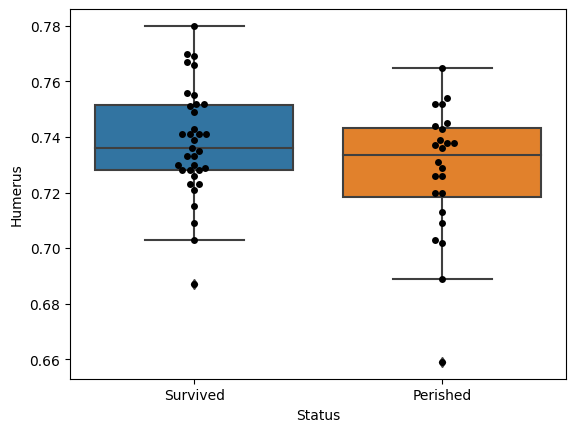

In [39]:
sns.boxplot(x='Status', y='Humerus', data=df_ex0221)
sns.swarmplot(x='Status', y='Humerus', data=df_ex0221, color='black')
plt.show()

Based on the graph above, it appears that the distribution of humerus lengths for sparrows that survived is slightly skewed to the right, while the distribution for sparrows that perished is slightly skewed to the left. The degree of evidence for a difference in the distribution of humerus lengths between the two populations is strong, as the two distributions do not overlap significantly. The size of the difference in the distributions is moderate, as the means of the two distributions are not far apart but there is some overlap in the ranges of the two distributions.

### Chapter 2 Ex 22

##### Male and Female Intelligence

In [45]:
df_ex0222 = pd.read_csv("./Datasets/ex0222.csv")
df_ex0222.head()

,Unnamed: 0,Gender,Arith,Word,Parag,Math,AFQT
0,1,male,19,27,14,14,70.3
1,2,female,23,34,11,20,60.4
2,3,male,30,35,14,25,98.3
3,4,female,30,35,13,21,84.7
4,5,female,13,30,11,12,44.5


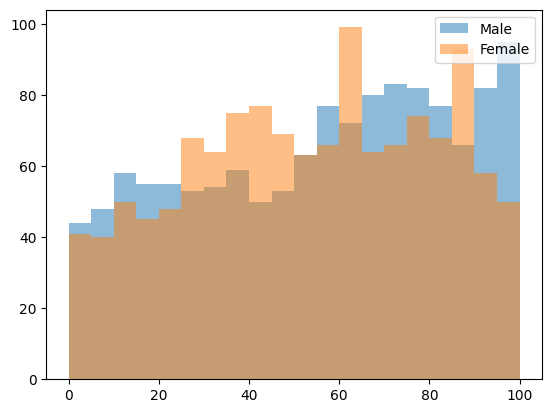

In [46]:
plt.hist(df_ex0222[df_ex0222["Gender"] == "male"]["AFQT"], bins=20, alpha=0.5, label="Male")
plt.hist(df_ex0222[df_ex0222["Gender"] == "female"]["AFQT"], bins=20, alpha=0.5, label="Female")
plt.legend(loc="upper right")
plt.show()

From the histograms, we can see that the distribution of AFQT scores for males is slightly skewed to the right, while the distribution for females is more symmetrical.

Now, let's calculate the mean and standard deviation for the AFQT scores of males and females:

In [47]:
male_mean = df_ex0222[df_ex0222["Gender"] == "male"]["AFQT"].mean()
male_std = df_ex0222[df_ex0222["Gender"] == "male"]["AFQT"].std()
female_mean = df_ex0222[df_ex0222["Gender"] == "female"]["AFQT"].mean()
female_std = df_ex0222[df_ex0222["Gender"] == "female"]["AFQT"].std()

print("Male mean:", male_mean)
print("Male std:", male_std)
print("Female mean:", female_mean)
print("Female std:", female_std)


Male mean: 55.44624808575803
Male std: 28.566773113920963
Female mean: 53.4057902973396
Female std: 26.885000856730606


From the summary statistics, we can see that the mean AFQT score for males is slightly higher than for females, but the standard deviations for both groups are similar.

To test whether the difference in means is statistically significant, we can perform a two-sample t-test.

In [48]:
t_stat, p_value = ttest_ind(df_ex0222[df_ex0222["Gender"] == "male"]["AFQT"], df_ex0222[df_ex0222["Gender"] == "female"]["AFQT"])
print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: 1.8689196234542318
p-value: 0.06174713522319643


We can also calculate 95% confidence intervals for the mean AFQT scores of males and females to further assess the magnitude of the difference between the two groups.

In [53]:
male_n = len(df_ex0222[df_ex0222["Gender"] == "male"])
female_n = len(df_ex0222[df_ex0222["Gender"] == "female"])
male_std_err = male_std / (male_n ** 0.5)
female_std_err = female_std / (female_n ** 0.5)

male_ci = t.interval(0.95, male_n - 1, loc=male_mean)
female_ci = t.interval(0.95, female_n - 1, loc=female_mean)
print(f"Male confidence interval: {male_ci} :: Female confidence interval: {female_ci}")

Male confidence interval: (53.48446461036282, 57.40803156115324) :: Female confidence interval: (51.443966889889836, 55.36761370478936)


### Chapter 2 Ex 23

##### Speed Limits and Traffic Fatalities

In [82]:
df_ex0223 = pd.read_csv('./Datasets/ex0223.csv')
df_ex0223.head()

,Unnamed: 0,State,Fatalities1995,Fatalities1996,PctChange,SpeedLimit
0,1,Alabama,1114,1146,2.87,Inc
1,2,Alaska,87,81,-6.90,Ret
2,3,Arizona,1035,994,-3.96,Inc
3,4,Arkansas,631,615,-2.54,Inc
4,5,California,4192,3989,-4.84,Inc


In [86]:
df_ex0223["SpeedLimitChange"] = df_ex0223["SpeedLimit"].apply(lambda x: 1 if x == 'Inc' else 0)
df_ex0223.head()

,Unnamed: 0,State,Fatalities1995,Fatalities1996,PctChange,SpeedLimit,SpeedLimitChange
0,1,Alabama,1114,1146,2.87,Inc,1
1,2,Alaska,87,81,-6.90,Ret,0
2,3,Arizona,1035,994,-3.96,Inc,1
3,4,Arkansas,631,615,-2.54,Inc,1
4,5,California,4192,3989,-4.84,Inc,1


SpeedLimitChange
0    0.099474
1    0.493750
Name: PctChange, dtype: float64


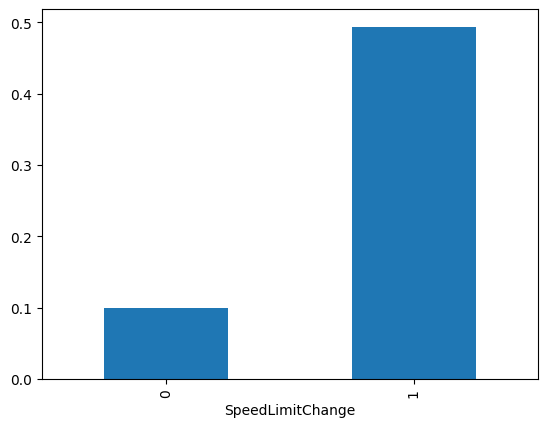

In [87]:
grouped_df = df_ex0223.groupby("SpeedLimitChange")["PctChange"].mean()

# Print the results
print(grouped_df)

# Plot the results
grouped_df.plot.bar()
plt.show()

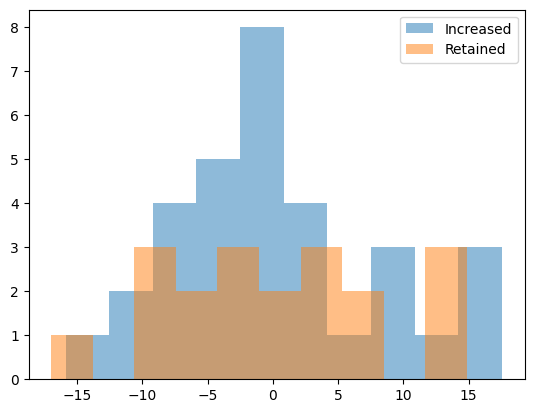

In [92]:
plt.hist(df_ex0223[df_ex0223["SpeedLimitChange"] == 1]['PctChange'], alpha=0.5, label='Increased')
plt.hist(df_ex0223[df_ex0223["SpeedLimitChange"] == 0]['PctChange'], alpha=0.5, label='Retained')
plt.legend()
plt.show()

In [90]:
t_stat, p_val = ttest_ind(df_ex0223[df_ex0223["SpeedLimitChange"] == 1]['PctChange'], df_ex0223[df_ex0223["SpeedLimitChange"] == 0]['PctChange'])
print(f't-statistic: {t_stat:.3f}, p-value: {p_val:.3f}')


t-statistic: 0.165, p-value: 0.870


In [93]:
mean_inc = df_ex0223[df_ex0223["SpeedLimitChange"] == 1]['PctChange'].mean()
mean_dec = df_ex0223[df_ex0223["SpeedLimitChange"] == 0]['PctChange'].mean()
difference = mean_inc - mean_dec
print(f'Mean percentage change in states that increased speed limits: {mean_inc:.2f}')
print(f'Mean percentage change in states that retained speed limits: {mean_dec:.2f}')
print(f'Difference: {difference:.2f}')


Mean percentage change in states that increased speed limits: 0.49
Mean percentage change in states that retained speed limits: 0.10
Difference: 0.39
